<i><b>Public AI</b></i>
<br>

# 신경망의 구조


### _Objective_
1. **딥러닝과 신경망** : 딥러닝과 신경망의 개념을 배우고, 신경망(Neural Network)의 유래가 된 퍼셉트론의 기본 구조를 알아봅니다.
2. **신경망의 구조**: 딥러닝 신경망의 기본 구조 및 표기법을 알아봅니다.  
3. **활성함수**: 대표적인 활성함수(Activation Function)와 함수 출력 결과의 형태에 대해 알아봅니다.<br>



In [10]:
%matplotlib inline

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# \[ 1. 딥러닝과 신경망 \]

지난 Sectoin에서 딥러닝 알고리즘이 이미지를 인식하는 방식이 사람이 이미지를 인식하는 방식과 매우 유사하다는 이야기를 했었습니다. 어떻게 이것이 가능하게 되었을까요? 딥러닝에서 기본적으로 사용되는 신경망(Neural Network)은 동물의 대뇌피질을 구성하는 뉴런(Neuron)을 본따서 만들어졌습니다. 신경계 내 뉴런의 모습을 간략하게 알아보고, 이를 모방하여 수학적으로 정의한 퍼셉트론(Perceptron) 모델을 알아봅시다.<br>

## 1. 생물학적 뉴런의 모습

동물의 대뇌 피질은 뉴런으로 구성되어 있습니다. 개개의 생물학적 뉴런은 아주 단순하게 동작하지만, 두뇌는 이러한 생물학적 뉴런이 수십억개가 모여 구성되어 있습니다. 과학자들은 사람의 두뇌처럼, 단순한 뉴런으로 네트워크를 구성하면, 사람과 유사한 기능을 수행할 수 있는 알고리즘을 만들 수 있지 않을까라는 가설을 세우게 되었고, 여기서부터 신경망(Neural Network)의 연구가 시작되었습니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/1920px-Neuron.svg.png" width="800" height="600"/>

동물 신경망을 구성하는 뉴런은 아래와 같이 크게 세 부분으로 구성됩니다.
* 수상돌기(Dentrite) : 신호를 받아들이는 부분
* 세포체(Nucueus) : 신호를 받아 다음 신호의 출력을 결정하는 부분
* 축색돌기(Axon Terminal) : 출력 신호를 전달하는 부분

인간의 두뇌에는 이렇게 생긴 뉴런 1000억 개가 네트워크를 구성하고 있습니다. 

## 2. 퍼셉트론

과학자들은 이러한 동물의 뉴런을 보고 아이디어를 얻어 뉴런의 형태를 수학적으로 단순화한 모델, '퍼셉트론'을 고안해냈습니다. 아래 도식화된 이미지를 보면, 형태는 비슷해보입니다. 그렇다면 개념적으로는 뉴런의 어떤 점을 본따 도식화한 것일까요? 뉴런은 기본적으로 다수의 신호를 받아 하나의 신호를 전달하는 형태를 가지죠. 퍼셉트론 역시 다수의 신호를 입력받아 하나의 신호로 출력하는 구조를 가집니다. 동물 신경망에서는 가장 작은 단위인 뉴런이 모여 뇌를 구성한다면, 인공 신경망에서 가장 작은 단위는 '유닛'이라고 합니다. 즉, 퍼셉트론을 세는 단위를 '유닛'이라고 하는 것이죠.

하나의 퍼셉트론 유닛을 좀 더 자세하게 들여다봅시다. 

<img src="https://i.imgur.com/5oGstBm.png" width="300" >

$$
z = w_1x_1 + w_2x_2 + b \\
y = \sigma(z)
$$

각각의 의미는 아래와 같습니다.

### (1) 가중치, `weight`

$w_1$과 $w_2$는 각 신호($x$)의 가중치를 나타내는 매개변수로, 각 신호의 영향력을 제어합니다.

### (2) 편향, `bias`

$b$는 해당 퍼셉트론이 얼마나 쉽게 활성화되느냐를 제어합니다.

### (3) 활성화 함수, Activation Function
$h(z)$는 활성화 함수로, 입력 신호의 총합($z$)을 출력 신호($y$)로 변환하는 함수를 의미합니다.<br>
일반적으로 은닉층에서의 활성화 함수는 아래의 RELU 함수를 이용합니다. RELU는 아래와 같이 0을 기준으로 꺽인 함수를 의미합니다.

$$
RELU(x) = \begin{cases}
1 & \mbox{if } x\ge0 \\ 
0 & \mbox{if } x\lt0 \\ 
\end{cases}
$$

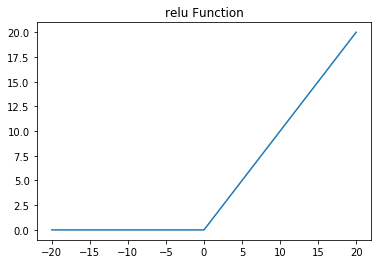

In [3]:
def relu_func(x):
    return np.maximum(x,0)

x = np.linspace(-20.0,20.0,101)
y = relu_func(x)

plt.title("relu Function")
plt.plot(x,y)
plt.show()

### (4) Keras에서 한 개의 뉴런 구성하기

<img src="https://i.imgur.com/UiInjKy.png" width="300" >

위의 그림과 같이 입력이 2개이고, 활성화함수가 RELU인 뉴런을 구성해보도록 하겠습니다.

In [4]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# 입력층 생성하기
inputs = #

# 뉴런 생성하기
neuron = #

# 입력층을 뉴런에 연결하기
output = #

model = #

### (5) 3개의 뉴런 구성하기

<img src="https://i.imgur.com/qrglbGS.png" width="300" >

위의 그림과 같이 입력이 2개이고, 활성화함수가 RELU인 뉴런을 동시에 3개를 만들도록 하겠습니다.

In [6]:
# 입력층 생성하기
inputs = #

# 뉴런 생성하기
neurons = #

# 입력층을 뉴런에 연결하기
output = #

model = #

가중치, 편향, 활성화 함수 등으로 구성된 유닛이 여러개 모인 것이 바로 '인공 신경망'입니다. 이번 Section에서는 신경망의 구조와 함께 세가지 인자에 대해 좀 더 자세히 알아보겠습니다.


# \[ 2. 신경망의 구조 \]

신경망을 이미지나 도식으로 표시할 때에 주로 이용되는 몇 가지 관례(Convention)가 있습니다. 논문이나 책의 저자 마다 약간씩 표기방법(Notation)이 다르지만, 대체로 사용되고 있는 표기를 이해하고 있어야 논문이나 자료를 이해할 수 있을 것입니다. 이번에는 신경망의 구조를 배우면서 신경망을 구성하는 각 요소를 표기하는 방법까지 알아보겠습니다. 

보다 구체적으로는, (1) 신경망의 기본 구조를 알아보고, 이를 도식과 수식으로 표현하는 대략적인 방법과 딥러닝 프레임워크인 Keras에서 각 구성 요소를 코드로 표현하는 방식을 살펴보겠습니다. 그 다음에는 (2) 도식과 Kreas를 이용해 신경망의 세부 구성요소를 좀 더 자세히 알아보도록 하겠습니다.

## 1. 신경망의 기본 구조
모든 신경망은 3가지 종류의 층을 가지고 있습니다. <br>

    1. 입력층(Input Layer) : 입력 신호를 받는 층 
    2. 은닉층(Hidden Layer) : 입력층과 출력층 사이를 구성하는 층
    3. 출력층(Output Layer) : 출력 값을 반환하는 층


### (1) 도식으로 2층 신경망 표현하기
동물 신경망에서의 뉴런 하나하나를 신경망에서는 유닛(Unit)라고 부르고, 각 층(Layer) 마다의 뉴런들이 모여 집합을 이룹니다. 아래에 도식으로 표현된 신경망은 몇 개의 층으로 구성된 신경망일까요? 

총 입력층, 은닉층, 출력층 각각 1개씩 총 3개의 층으로 구성되어있지만, 가중치(weight, $W^{[1]}, W^{[2]}$)를 갖는 층은 2개 뿐이기 때문에 보통 "2층 신경망"이라고 부릅니다. 관례상 입력층은 0번째 층으로 표기하고, 입력층을 제외한 나머지 층의 갯수를 헤아립니다.

<img src="https://i.imgur.com/LeSOS7p.png" width="300">


### (2) Keras로 2층 신경망 표현하기

`tensorflow.keras`를 이용해 위와 같이 생긴 신경망을 구성해봅시다.

In [8]:
# 입력값의 형태 결정하기
inputs = #

# 은닉층의 형태 결정하기
hidden = #

# 출력값의 형태 결정하기 
outputs = #

# 모델 구성하기
model = #

`tensorflow.keras`로 구성한 신경망`model`의 정보를 간략하게 보고 싶다면, `.summary()` 메소드를 이용합니다. 각 층은 `inputs`, `hidden`, `output`으로 이름붙였기 때문에 좌측에 Layer의 이름이 출력됨을 알 수 있습니다. 가중치를 가지는 층은 `hidden`, `output` 층으로, 이 두 층에만 `Param #`에 값이 가중치의 갯수가 적혀있습니다. 가중치를 갖는 층은 2개 층이므로 이를 2층 신경망이라고 부릅니다. 

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 2)]               0         
_________________________________________________________________
hidden (Dense)               (None, 3)                 9         
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


### (3) Keras로 5층 신경망 표현하기

은닉층은 꼭 1개일 필요가 없습니다. 딥러닝에서 Deep은 은닉층이 수없이 많이 쌓여있다는 의미의 Deep입니다. <br>
5층짜리 신경망을 한번 구성해보도록 하겠습니다.

<img src = 'https://i.imgur.com/05yfPcE.png' width = 800>

`hidden, hidden1, hidden2, hidden3`로 총 4개의 은닉층을 만들어, 출력층까지 합쳐 5층 신경망이 만들어봅시다. 각 은닉층은 3개의 유닛으로 구성합니다. 

In [12]:
# 입력값의 형태 결정하기
inputs = #

# 은닉층의 형태 결정하기
hidden1 = #
hidden2 = #
hidden3 = #
hidden4 = #

# 출력값의 형태 결정하기 
outputs = #

# 모델 구성하기
model = #

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 2)]               0         
_________________________________________________________________
hidden (Dense)               (None, 3)                 9         
_________________________________________________________________
hidden1 (Dense)              (None, 3)                 12        
_________________________________________________________________
hidden2 (Dense)              (None, 3)                 12        
_________________________________________________________________
hidden3 (Dense)              (None, 3)                 12        
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_______________________________________________________________


## 2. 신경망의 세부 구성요소

이제 신경망의 세부 구성요소와 그 표기법을 좀 더 자세히 살펴봅시다. 우선 아래와 같은 네트워크를 생성해보도록 하겠습니다.

<img src="https://i.imgur.com/939whoH.png" width="300" >

In [17]:
inputs = #
hidden = #
outputs = #

model = #

### (1) 층(Layer)과 유닛(Unit)

앞서 살펴본 2층 신경망의 이미지를 다시 이용하되 이번에는 각 층을 구성하는 유닛을 표기하는 방법을 자세히 알아봅시다.

<img src="https://i.imgur.com/dTxnlTm.png" width="300"/>

위 이미지를 보면, 각 층은 원으로 표현된 유닛으로 구성되어 있습니다. 

각각의 첨자는 어떤 의미일까요? 각 유닛은 "몇 번째 층"의 "몇 번째" 유닛인지 표기하여 구분할 수 있습니다. 이를 표기하기 위해 주로 "층의 번호"는 위첨자를 이용해 기록하고, 층 내에서 유닛의 위치(즉, index)는 아랫첨자를 이용해 기록합니다. 

- 유닛의 층 번호 : 윗첨자를 이용해 기록
- 층 내 유닛의 위치 : 아래첨자를 이용해 기록

예를 들어, 1번 층(hidden layer)의 전체 유닛은 $a^{[1]}$로 표기하고, 1번 층의 1번째 유닛은 $a_1^{[1]}$로 표기할 수 있을 것입니다.

### (2) 각 층의 유닛 수

위의 신경망에서 각 층 별 unit 수를 헤아려보면 아래와 같습니다.


* 입력층 : $(x_1,x_2,x_3)$으로 3개의 유닛
* 은닉층 : $(a_1^{[1]},a_2^{[1]},a_3^{[1]},a_4^{[1]})$으로 4개의 유닛
* 출력층 : $a^{[2]}$으로 1개의 유닛

Keras에서 생성한 신경망에 `.layers`를 이용하여 각 layer를 담고 있는 리스트를 얻을 수 있고, `layer.output_shape`를 이용해 각 층을 구성하는 유닛의 수를 알 수 있습니다. 각 층의 유닛 수를 코드를 통해 확인해봅시다.

In [18]:
for layer in model.layers:
    print(f"{layer.name}의 output shape : {layer.output_shape}")

inputs의 output shape : [(None, 3)]
hidden의 output shape : (None, 4)
output의 output shape : (None, 1)


각 층의 shape을 확인할 때 나오는 `None`은 배치(batch)를 의미합니다. 한번에 몇개의 데이터를 처리하는가를 의미합니다. 보통 학습을 할 때에 하나의 데이터만을 보고 가중치를 갱신하는 것이 아니라, 32, 64, 128 등 복수개의 데이터를 통해 손실함수를 계산 후 가중치를 갱신합니다.

### (3) 가중치(Weight)와 편향(bias)

각 유닛에는 가중치와 편향이 존재합니다. 유닛 별로 가중치와 편향이 존재하기 때문에, 각 노드의 하단에 표기해 보겠습니다. 유닛과 마찬가지로 윗첨자를 이용해 층의 번호를, 아래첨자를 이용해 층 내 유닛의 위치를 표기합니다. 

<img src="https://i.imgur.com/QoQpUER.png" width="500">

위와 같이 구성되어 있을 경우, 첫번째 은닉층에서의 연산은 아래와 같이 전개됩니다.

1) **로짓연산**
$$
z^{[1]}_1 = x_1 w^{[1]}_{1,1} + x_2 w^{[1]}_{2,1} + x_3 w^{[1]}_{3,1} + b^{[1]}_{1}   \\
z^{[1]}_2 = x_1 w^{[1]}_{1,2} + x_2 w^{[1]}_{2,2} + x_3 w^{[1]}_{3,2} + b^{[1]}_{2}   \\
z^{[1]}_3 = x_1 w^{[1]}_{1,3} + x_2 w^{[1]}_{2,3} + x_3 w^{[1]}_{3,3} + b^{[1]}_{3}   \\
z^{[1]}_4 = x_1 w^{[1]}_{1,4} + x_2 w^{[1]}_{2,4} + x_3 w^{[1]}_{3,4} + b^{[1]}_{4}   \\
$$

2) **활성화함수**
$$
a^{[1]}_1 = \sigma(z^{[1]}_1)   \\
a^{[1]}_2 = \sigma(z^{[1]}_2)   \\
a^{[1]}_3 = \sigma(z^{[1]}_3)   \\
a^{[1]}_4 = \sigma(z^{[1]}_4)   \\
$$

위와 같이 전개되는 곱셈과 덧셈이 반복되는 수식을 우리는 행렬과 행렬곱을 통해 간단히 나타낼 수 있습니다. 우선 각 층의 출력값과 가중치를 행렬로 나타내면 아래와 같습니다.

$$
Z^{[1]} = \begin{bmatrix} z^{[1]}_1 &  z^{[1]}_2 &  z^{[1]}_3 &  z^{[1]}_4 \end{bmatrix}
$$
<br>
$$
X^{[1]} = \begin{bmatrix} x^{[1]}_1 &  x^{[1]}_2 &  x^{[1]}_3 \end{bmatrix}
$$
<br>
$$
W^{[1]} = \begin{bmatrix} 
w^{[1]}_{1,1} &  w^{[1]}_{1,2} &  w^{[1]}_{1,3} &  w^{[1]}_{1,4} \\
w^{[1]}_{2,1} &  w^{[1]}_{2,2} &  w^{[1]}_{2,3} &  w^{[1]}_{2,4} \\
w^{[1]}_{3,1} &  w^{[1]}_{3,2} &  w^{[1]}_{3,3} &  w^{[1]}_{3,4} \\\end{bmatrix}
$$
<br>
$$
b^{[1]} = \begin{bmatrix} b^{[1]}_1 &  b^{[1]}_2 &  b^{[1]}_3 &  b^{[1]}_4 \end{bmatrix}
$$

으로 정의하면,


$$
Z^{[1]} = X^{[1]}W^{[1]} + b^{[1]}
$$

와 같이 나타낼 수 있습니다. Keras에서는 위와 같이 로짓 연산을 수행하고, 활성화함수는 아래와 같이 모든 원소별로 각기 적용하는 식으로 구성되어 있습니다.

$$
a^{[1]} = \sigma(Z^{[1]}) =  \begin{bmatrix} \sigma(z^{[1]}_1) &  \sigma(z^{[1]}_2) &  \sigma(z^{[1]}_3) &  \sigma(z^{[1]}_4) \end{bmatrix}
$$

### (4) 각 가중치(weight)의 크기

각 층 별 가중치는 연결되어 있는 이전 층의 유닛 수만큼 존재해야 합니다.

* $W^{[1]}$의 shape : (입력층의 unit 수,은닉층의 unit 수) = (3,4)
* $W^{[2]}$의 shape : (은닉층의 unit 수,출력층의 unit 수) = (4,1)

1번 층(hidden layer)과 2번 층(output layer)이 가지는 가중치는 `layer.get_weights()[0]`로 얻을 수 있으며,  `.shape`로 가중치의 크기를 알 수 있습니다. 아래 결과를 보면, 1번 층은 (3,1) 형태의 가중치 벡터가 4개 모여 있으므로, 가중치의 형태가 (3,4)가 됨을 알 수 있습니다.

In [19]:
for layer in model.layers[1:]:
    weight = layer.get_weights()[0]
    print(f"{layer.name}의 weight shape : {weight.shape}")

hidden의 weight shape : (3, 4)
output의 weight shape : (4, 1)


### (5) 각 편향(bias)의 크기

각 유닛 별 편향은 하나씩 존재하므로, 각 층의 편향은 층의 유닛수와 동일합니다.

* $b^{[1]}$의 shape : (은닉층의 unit 수) = (4,)
* $b^{[2]}$의 shape : (출력층의 unit 수) = (1,)

1번 층(hidden layer)과 2번 층(output layer)이 가지는 편향은 `layer.get_weights()[1]` 로 얻을 수 있으며, `bias.shape`로 편향의 크기를 알 수 있습니다.

In [20]:
for layer in model.layers[1:]:
    bias = layer.get_weights()[1]
    print(f"{layer.name}의 bias shape : {bias.shape}")

hidden의 bias shape : (4,)
output의 bias shape : (1,)


# \[ 3. 활성화 함수 \]

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 활성화 함수의 기본 개념

### (1) 활성화 함수란?
먼저, 앞서 반복적으로 살펴보았던 아래의 계산 그래프를 수식으로 표현하면 이와 같습니다.  
$$
z = w_0 + w_1x_1 + w_2x_2 \\
y = \sigma(z) \\
$$

아래 계산그래프에서 $h(z)$가 바로 활성화 함수를 의미합니다. 활성화 함수란 입력 신호의 총합을 출력 신호로 변환하는 함수를 뜻합니다.<br>

<img src="https://i.imgur.com/zGPkQxT.png" width="300" >


활성화 함수에는 다양한 종류가 있습니다. 활성화 함수 중 하나인 시그모이드 함수를 활성화 함수로 사용하면 출력 신호가 어떻게 변환될까요? 

시그모이드 함수는 아래의 수식으로 정의됩니다.

${\displaystyle S(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}}$

위 수식을 python의 함수로 정의하면 아래와 같이 정의할 수 있으며, 그래프를 그려보면 아래와 같이 그릴 수 있습니다.

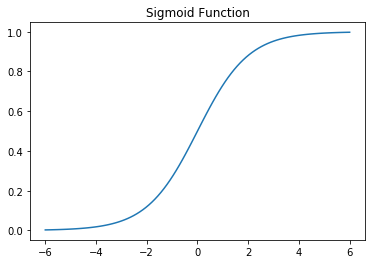

In [22]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-6.0,6.0,101)
y = sigmoid(x)

plt.title("Sigmoid Function")
plt.plot(x,y)
plt.show()

### (2) 활성화 함수의 종류

활성화 함수에는 앞서 살펴본 시그모이드 함수 외에도 시그모이드 함수, 탄 함수, 렐루 함수, 리키 렐루 함수 등이 있습니다. Keras에서는 이러한 다양한 활성화 함수를 지원합니다. 활성화 함수에 대한 API는 `keras.activations`에 있습니다. 자주 쓰이는 다양한 활성화함수에 대해 알아보도록 하겠습니다.


<img src="https://i.imgur.com/d04ZKEM.png" width="800" height="600"/><br>

* 시그모이드 함수(Sigmoid Function)

로지스틱 회귀분석에서 이용했던 로지스틱 함수(Logistic Function)도 일종의 활성화함수입니다. 변환된 함수의 형태가 S자 형태라는 닮았다는 것에서 비롯해서, 시그모이드 함수(Sigmoid Function)이라고 부릅니다. 

- 하이퍼볼릭 탄젠트 함수(TanH Function)

하이퍼볼릭 탄젠트 함수는 시그모이드 함수의 크기와 위치를 조절한 함수입니다. 시그모이드 함수의 출력값이 0부터 1사이의 값이었다면, 하이퍼볼릭 탄젠트 함수의 출력값은 -1부터 1사이의 출력값을 가집니다. 시그모이드 함수와의 관계식과 미분식은 각각 아래와 같습니다.

${\displaystyle tanh(x)={\frac {e^{x}-e^{-x}}{e^{x}-e^{-x}}}}$

* 렐루 함수(ReLU Function)

현대 딥러닝에서는 활성화 함수로 로지스틱 함수(Logistic Function)보다는 렐루 함수(ReLU Function)가 많이 사용됩니다. 렐루 함수는 0을 기준으로 출력을 활성화하고 아니면 출력을 0으로 제한하는 함수를 의미합니다.

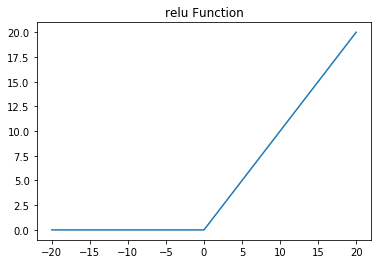

In [23]:
def relu_func(x):
    return np.maximum(x,0)

x = np.linspace(-20.0,20.0,101)
y = relu_func(x)

plt.title("relu Function")
plt.plot(x,y)
plt.show()

## 2. 비선형 함수의 이점

활성화 함수를 통해 퍼셉트론의 출력값을 제한할 수 있다고 배웠습니다. 딥러닝에서 사용되는 활성화 함수는 출력값을 제한하는 것 외에도, **비선형 함수**라는 공통점이 있습니다. 신경망에서는 활성화 함수로 비선형 함수를 사용하는 것이 필수입니다. 왜냐하면 선형 함수로는 층을 깊게 쌓을 수 없기 때문입니다.

층을 깊게 쌓을 수 없다는 것이 어떤 의미일까요? 선형 함수를 이용해 2개 층을 쌓아봅시다. 

선형 함수 $f(x) = 2x+3$를 하나 정의하여 한 층을 구성하고, 이 함수의 출력값을 다시 입력받아 출력하는 $g(x) = f(f(x))$을 2 번째 층으로 만들어보겠습니다. 

$
f(x) = 2x+3
$

$
g(x) = f(f(x)) \\
\ \ \ \ = 2(2x+3)+3 \\
\ \ \ \ = 4x + 9
$

**층을 두 개 만들어 쌓았지만, 하나의 층이 있는 것과 동일하게 직선의 형태를 결과로 반환하게 되는 것이죠.** 반면, 비선형 함수는 층을 쌓을 수록 직선 외의 다양한 곡선의 형태를 만들어 낼 수 있다는 특징을 가집니다. 

## 3. 쌓아서 생기는 이점 : Universial Approximation Theorem

### (1)  보편 근사 정리 의미 (시벤코 정리)

시벤코 정리는 하나의 은닉층을 갖는 인공신경망은 임의의 연속인 다변수 함수를 원하는 정도의 정확도로 근사할 수 있음을 말합니다. 즉 인공신경망은 선형 회귀와 달리, **비선형 함수**도 근사할 수 있다는 것을 말합니다.

<img src="https://i.imgur.com/Ha4ubDo.png" width="600" height="450"/>

### (2) 신경망의 너비와 깊이의 비교

신경망의 유닛 수가 증가할수록, 근사하고자 하는 함수와 근사 수준이 높아집니다. 그렇다면 유닛수는 많으면 많을수록 좋을까요? 지나치게 유닛이 많아 가중치(weight)의 수가 증가하면, Overfitting 문제가 발생하기 쉬워집니다. 즉, 현재 가지고 있는 데이터셋에는 효과적이지만 새로운 데이터셋에는 효과적이지 않은 모델이 만들어지는 것이죠. 따라서 무작정 유닛수를 높인다고 좋은 것은 아닙니다.<br>

<img src="https://i.imgur.com/udj3bZN.png" width="800" height="600"/>

Reference : On the number of Linear Regions of deep Neural Networks

유닛의 수를 늘리는 방법에는 신경망의 너비를 넓히는 방법과 깊이를 깊게 하는 방법이 있습니다. 신경망의 너비를 넓힌다는 것은 한 층을 구성하는 유닛의 수를 늘린다는 것이고, 깊이를 깊게 한다는 것은 층을 여러개 쌓는다는 것입니다. 

신경망의 깊이가 정확히 어떠한 효과를 가져오는지, 증명된 바는 적지만, 일반적으로 깊이가 깊어질수록, 근사하는 수준이 좋아지고, 일반화 효과가 매우 좋아집니다. 현대 많은 신경망들은 너비를 크게 하는 대신(즉, 층 내의 유닛 수를 늘리는 대신), 층을 여러개 쌓아 깊이를 깊게 함으로써 각 층의 가중치(weight)의 수를 줄이고, 일반화 효과를 크게 가져가는 데에 주력하고 있습니다.

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/09/16


---